Importing the required libraries and methods

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import sklearn as sklearn

%matplotlib inline

Reading in the dataset

In [37]:
filename = '../listings.csv'
data = pd.read_csv(filename)
data.info

D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (43,87,88) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<bound method DataFrame.info of              id                            listing_url       scrape_id  \
0          2515      https://www.airbnb.com/rooms/2515  20180908060534   
1          2539      https://www.airbnb.com/rooms/2539  20180908060534   
2          2595      https://www.airbnb.com/rooms/2595  20180908060534   
3          3330      https://www.airbnb.com/rooms/3330  20180908060534   
4          3647      https://www.airbnb.com/rooms/3647  20180908060534   
5          3831      https://www.airbnb.com/rooms/3831  20180908060534   
6          4484      https://www.airbnb.com/rooms/4484  20180908060534   
7          5022      https://www.airbnb.com/rooms/5022  20180908060534   
8          5099      https://www.airbnb.com/rooms/5099  20180908060534   
9          5121      https://www.airbnb.com/rooms/5121  20180908060534   
10         5172      https://www.airbnb.com/rooms/5172  20180908060534   
11         5178      https://www.airbnb.com/rooms/5178  20180908060534   
12    

Removing the extra columns:

Cleaning up the remaining columns (not ready yet!)

In [44]:
# Cleaning the zipcode series:
# The missing zipcodes can be replaced using the neighborhood name or coordinates (??)
zip_types = pd.Series([type(i) for i in data.zipcode])
print(zip_types.value_counts())
for i in range(len(data.zipcode)):
    if isinstance(data.zipcode[i], str) and ('\n' in data.zipcode[i]):
        data.zipcode[i] = data.zipcode[i][0:5]
    elif isinstance(data.zipcode[i], str):
        data.zipcode[i] = int(data.zipcode[i])
    elif np.isnan(data.zipcode[i]):
        data.zipcode[i] = 0
    else:
        data.zipcode[i] = int(data.zipcode[i])

<class 'str'>      27973
<class 'float'>    17839
<class 'int'>       4408
dtype: int64


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


KeyboardInterrupt: 

Training the lin-reg model

In [57]:
y = data['price']
x = data[['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']]

In [58]:
regr = linear_model.LinearRegression()
regr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [59]:
y_pred = regr.predict(x)

In [60]:
print('Coefficients: \n', regr.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y, y_pred))
print('Variance score: %.2f' % r2_score(y, y_pred))
print("R2:", sklearn.metrics.r2_score(y, y_pred))

Coefficients: 
 [ 2.43590984e+02 -8.68191898e+02 -4.08951190e-04 -2.77950475e-01
  2.51682148e-01  1.67189426e-01]
Mean squared error: 239870.99
Variance score: 0.01
R2: 0.008183751880632584


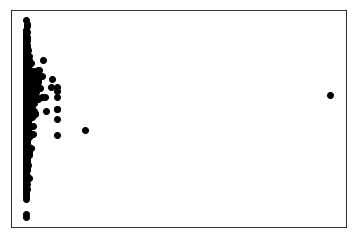

In [62]:
plt.scatter(y, y_pred, color='black')
# plt.plot(x, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()